# Linear regression
---

Linear regression is a statistical tool for modeling the relationship between some "explanatory" variables and some real valued outcome.

The domain set $X$ is a subset of $\mathbb{R}^d$, for some $d$, and the label set $Y$ is the set of real numbers.
We would like to learn a linear function $h: \mathbb{R}^d \rightarrow \mathbb{R}$ that best approximates the relationship between our variables.

The hypothesis class of linear regression predictor is the set of linear functions:

$$H_{reg} = L_d = \{x \rightarrow <w,x> + \; b \: : \: w \in \mathbb{R}^d, b \in \mathbb{R}\}$$

Next we need to define a loss function for regression.
While in classification the loss, defined as $l(h, (x, y))$ simply indicates whether $h(x)$ correctly predicts $y$ or not, in regression, if the correct label is $3$ both $3.0001$ and $4$ are wrong, but we would clearly prefer $3.0001$.
We therefore need to define how much we shall be penalized for the discrepancy between $h(x)$ and $y$.
One way is to use the squared-loss function:

$$l(h,(x,y)) = (h(x)-y)^2$$

For this loss function, the empirical risk function (average loss over the data points) is called the Mean Squared Error:

$$E_{in}(h) = \frac{1}{N} \sum_{i=1}^N (h(x_i) - y_i)^2$$

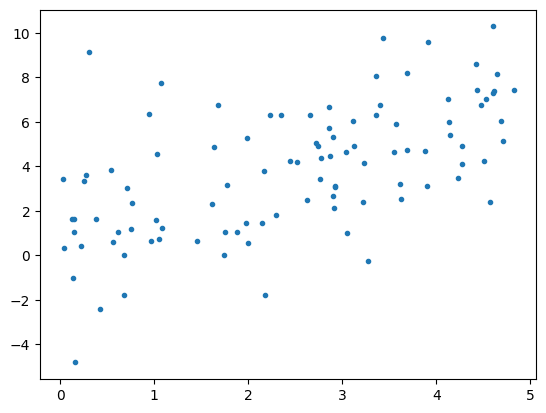

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
coeff = 5

X0 = np.ones(N)
# generate sample data
X1 = coeff * np.random.rand(N)

X = np.stack([X0, X1], axis=1)

# oracle (single linear)
y = 1.2 * X1 + 1 + 2 * np.random.randn(N)

plt.plot(X1, y, '.')

### Least Squares

Least squares is the algorithm that solves the ERM problem for the hypothesis class of linear regression predictors with respect to the squared loss.
The ERM problem with respect to this class, given a training set $S$, and using the homogenous version of $L_d$ is to find:

$$ \argmin_{w} L_S(h_w) = \argmin_{w} \frac{1}{N} \sum_{i=1}^N (<w,x_i>- \: y_i)^2$$

To solve the problem we calculate the gradient of the objective function and compare it to 0.
This means solving:

$$ \nabla{E_{in}(w)} = \frac{2}{N} \: x^T \: (x_w - y) = 0$$

I can remove $\frac{2}{N}$ since it's constant and we are trying to find a minimum.

$$x^T \: (x_w - y) = 0$$

$$x^T \: x_w - x^T y = 0$$

$$ w = \frac{y\, x^T}{x \, x^T} = (x \, x^T)^{-1} \, x^T \, y$$

$(x \, x^T)^{-1} \, x^T \, y$ is known as the *pseudo-inverse* of x

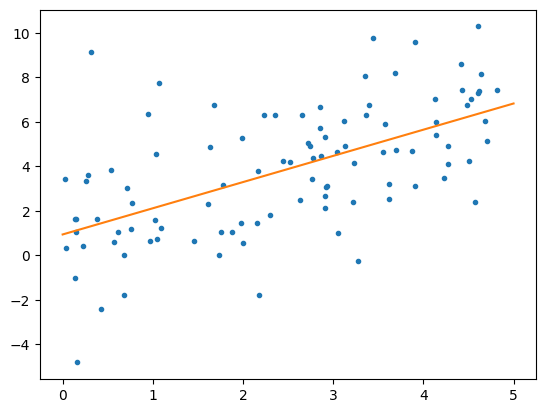

In [13]:
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

import matplotlib.pyplot as plt

plt.plot(X1, y, '.')
plt.plot([0, coeff], [w[0], coeff * w[1] + w[0]])

Let's see another example, this time instead of using a uniform distribution we use a normal distribution and take the sin of that

By using Least Squares:
[[ 0.29826391]
 [-0.11614148]]


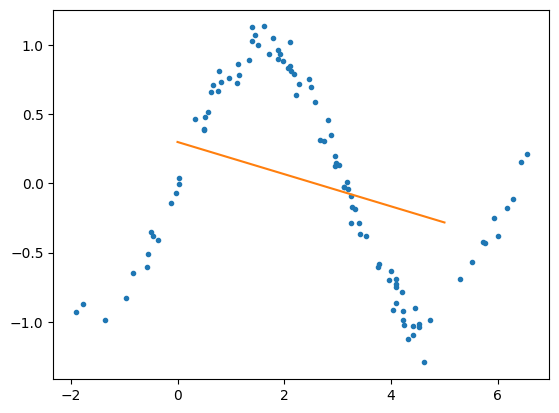

In [47]:
import numpy as np
import matplotlib.pyplot as plt

N = 100

X0 = np.ones((N,1))
X1 = np.random.normal(loc=2.5, scale=2.0, size=N)
# transform the array from 1D to 2D
X1 = X1[:, np.newaxis]
X = np.hstack((X0, X1))

# in the reshape the -1 makes numpy infer the dimension, sincewe have only
# 1 column the number of rows will be N
norm_noise = np.random.normal(loc=0, scale=0.1, size=N).reshape(-1, 1)

y = np.sin(X1) + norm_noise

w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

print("By using Least Squares:")
print(w)

plt.plot(X1, y, '.')
plt.plot([0,5], [w[0], 5 * w[1] + w[0]])